In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab import drive
from google.colab.patches import cv2_imshow

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# gogle drive 내에 있는 image파일을 경로로 잡아줍니다.
image_path = "drive/My Drive/Colab Notebooks/pattern recognition/image/"

img = cv.imread(image_path+"phdcomics01.png",1)

#왼쪽상단이 0,0에서 시작함.
px = img[100,100] # 100,100에 성분이 나옴, [B,R,G]
print('BPG values of (100,100)pixel:',px)

# accessing only blue pixel
blue = img[100,100,0]  # 3번째 요소는 BGR 이러면 blue값만 나옴 ,
# [x,y,n] x,y픽셀에 n번째 값을 가져오겠다. n = 0 : blue,  n = 1 : green  n = 2 : red
print(blue)

# accessing RED value
print(img.item(10,10,2)) # item으로도 할수 있어 (100,100)의 red값

# modifying RED value
img.itemset((10,10,2),77) # 값을 수정하는거야, 일종의 point opretor
print(img.item(10,10,2))
# 100,100 pixel의 red값이 195에서 77로 바뀜

# accessing image properties
print(img.shape) # tuple of (height, width, channels)
print(img.size)  # height x width x channels
print(img.dtype) # image datatype # uint8 양수만 2*8승개 즉 0~255

BPG values of (100,100)pixel: [212 203 195]
212
195
77
(280, 345, 3)
289800
uint8


[212 203 195]
[106  20 212]


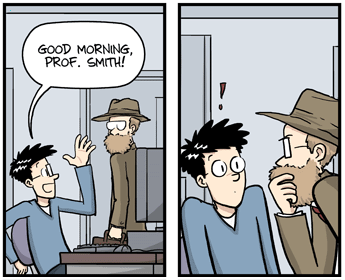

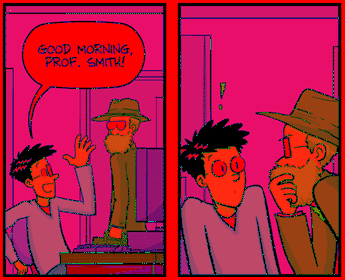

In [4]:
# 기존에 GRB를 배열로 되어있는 color space를 다른 color space로 바꿔주는거
# hsv: hue, saturaion,value (색,체도,명도)
hsvimg = cv.cvtColor(img, cv.COLOR_BGR2HSV) 
bgr = img[100,100]
print(bgr)  
hsv = hsvimg[100,100]
print(hsv)
cv2_imshow(img)
cv2_imshow(hsvimg) # 이건 RGB기준으로 뽑아내기에 이상한 그림으로 나오는겨

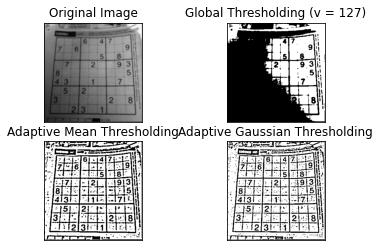

In [5]:
# 선과 숫자만 있는 이미지로 남기고 싶다. 일종의 Binary image
img = cv.imread(image_path+'sudoku.png',0)
# 127을 threshold로 잡고 그 아래는 검은색, 그 위는 흰색
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
#주변값들고려하는 neighborhood operators
# adaptiveTheshold(image,maxValue,adaptiveMethod,thresholdType,blockSzie,C[,dst])
# dst는 destination image 
# ADAPTIVE_THRESH_MEAN_C 방법: blockSize^2에서 평균을 구하고 - C해주는 거
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
#ADAPTIVE_THRESH_GAUSSIAN_C 방법 : threshold를 주변 block사이즈에서 가우스 weight 합 - c로 해서 구한것
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
#subplot으로 여러 이미지 띄우기
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # 좌표값들 없애는거
plt.show()

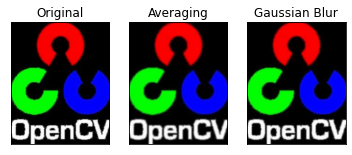

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(image_path+'opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25 # 내가만든 kernel이고 평균해주는 filter야 
dst = cv.filter2D(img,-1,kernel)  # (img, depth, kernnel) depth = -1일때 oupt image와 input image와 depth 동일
blur = cv.GaussianBlur(img,(5,5),0) # (사이즈,??) 가우시안 

# subplot(x,y,z): x by y로 이미지 배치할건데 그중 z번째 
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()